# Исследование привлечения пользователей приложения

В проекте проведем анализ данных развлекательного приложения Procrastinate Pro+. У нас есть данные о пользователях приложения, привлечённых с 1 мая по 27 октября 2019 года, выгрузка их покупок за этот период, а также статистика рекламных расходов. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

**Цель нашего исследования**:разобраться в причинах убытков компании и помочь выйти в плюс.

Для этого изучим:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-и-предобработка-данных" data-toc-modified-id="Изучение-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение и предобработка данных</a></span></li><li><span><a href="#Расчет-и-анализ-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Расчет-и-анализ-LTV,-ROI,-удержания-и-конверсии-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Расчет и анализ LTV, ROI, удержания и конверсии</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Окупаемость-рекламы-для-привлечения-пользователей" data-toc-modified-id="Окупаемость-рекламы-для-привлечения-пользователей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Окупаемость рекламы для привлечения пользователей</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение и предобработка данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
visits = pd.read_csv('datasets/visits_info_short.csv')
orders = pd.read_csv('datasets/orders_info_short.csv')
costs = pd.read_csv('datasets/costs_info_short.csv')

**Предобработка данных visits**

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице содержатся информация о посещениях сайта пользователями, привлеченными с 1 мая по 27 октября 2019 года, где:

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

In [5]:
# Заменим названия столбцов, приведя к нижнему регистру и убрав пробелы
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

В таблице visits нет пропусков, но есть несоответствие типам данных для столбцов session start и session end.

In [6]:
# преобразуем данные о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [7]:
# Обработаем пропуски при необходимости
visits.duplicated().sum()

0

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


**Предобработка данных orders**

In [9]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице содержатся информация о заказах, где:

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

In [11]:
# Заменим названия столбцов, приведя к нижнему регистру и убрав пробелы
orders.columns = ['user_id', 'event_dt', 'revenue']

В таблице orders нет пропусков, но есть несоответствие типам данных для столбца event_dt.

In [12]:
# преобразуем данные о времени
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [13]:
# Обработаем пропуски при необходимости
orders.duplicated().sum()

0

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


**Предобработка данных costs**

In [15]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице содержатся информация о затратах на маркетинг, где:

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

In [17]:
# Приведем названия столбцов к нижнему регистру
costs.columns = costs.columns.str.lower()

В таблице costs нет пропусков, но есть несоответствие типам данных для столбца dt.

In [18]:
# преобразуем данные о времени
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [19]:
# Обработаем пропуски при необходимости
costs.duplicated().sum()

0

In [20]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Проверим, есть ли пропуски в таблицах

In [21]:
round((visits.isna().mean()*100),2)

user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64

In [22]:
round((orders.isna().mean()*100),2)

user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64

In [23]:
round((costs.isna().mean()*100),2)

dt         0.0
channel    0.0
costs      0.0
dtype: float64

**Вывод**

На этапе предобработки данных мы изучили данные из файлов, привели названия столбцов таблиц к одному стилю, обработали дубликаты и заменили типы данных, где это было необходимо.

## Расчет и анализ LTV, ROI, удержания и конверсии

Соберём функции для создания профилей, расчёта удержания, конверсии, LTV и ROI

In [24]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())



    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [25]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [26]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [27]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [28]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [29]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [30]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [31]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Построим профили пользователей. 

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [32]:
# Получим профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [33]:
# Определим минимальную и максимальную дату привлечения пользователей.
print('Минимальная дата привлечения:', profiles['first_ts'].dt.date.min())
print('Максимальная дата привлечения:', profiles['first_ts'].dt.date.max())

Минимальная дата привлечения: 2019-05-01
Максимальная дата привлечения: 2019-10-27


Выясним, из каких стран приходят посетители, какие страны дают больше всего платящих пользователей.

In [34]:
(profiles.groupby('region')
         .agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
         .sort_values(by=('payer','mean'), ascending = False)
)


user_id payer          
              nunique   sum      mean
region                               
United States  100002  6902  0.069019
Germany         14981   616  0.041119
UK              17575   700  0.039829
France          17450   663  0.037994

Видим, что больше всего пользователей приходят из США, на втором месте с большим отрывом - Великобритания и Франция. 

При этом доля платящих пользователей для США также выше, чем в других странах.

Построим график, отображающий динамику привлечения новых пользователей в каждой стране

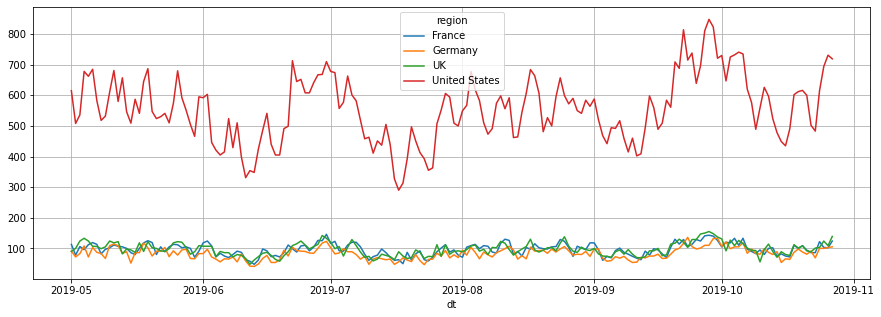

In [35]:
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='region',  # страны
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

Все страны, кроме США отличаются стабильностью: количество привлекаемых ими пользователей не опускается ниже определённого уровня. Для США же характерна высокая волатильность: от 300 до 850 новых пользователей в день, но даже минимальное значение выше уровня привлечения в других странах.

Выясним, какими устройствами пользуются клиенты, с каких устройств чаще всего заходят платящие пользователи.

In [36]:
(profiles.groupby('device')
         .agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
         .sort_values(by=('payer','mean'), ascending = False)
)

user_id payer          
        nunique   sum      mean
device                         
Mac       30042  1912  0.063644
iPhone    54479  3382  0.062079
Android   35032  2050  0.058518
PC        30455  1537  0.050468

Клиенты Procrastinate Pro+ заходят в приложение с устройств: Android, Mac, PC и iPhone. Первое место по использованию занимает iPhone, а вот доли платящих пользователей практически одинаковы для всех устройств, кроме ПК.

Построим график, отображающий динамику привлечения новых пользователей по каждому устройству

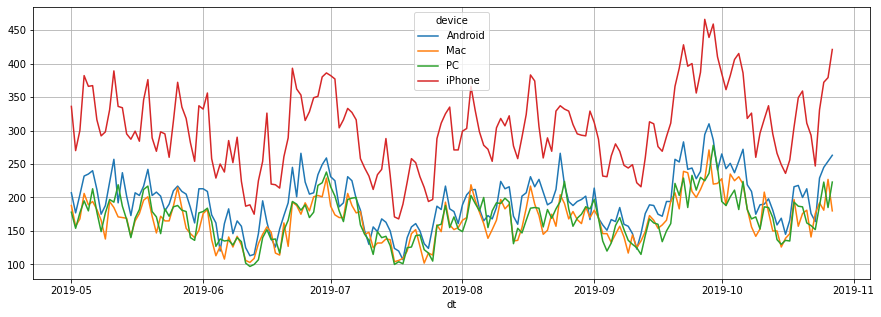

In [37]:
profiles.pivot_table(
    index='dt', # даты первых посещений 
    columns='device',  # устройства
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

На графике мы также видим, как выделяется привлечение новых пользователей с iPhone: новые посетители чаще всего заходят в приложение с iPhone, а привлечение новых пользователей с остальных устройств находятся примерно на одном уровне.

Выясним, по каким рекламным каналам шло привлечение пользователей, какие каналы приносят больше всего платящих пользователей.

In [38]:
(profiles.groupby('channel')
         .agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
         .sort_values(by=('payer','mean'), ascending = False)
)

user_id payer          
                   nunique   sum      mean
channel                                   
FaceBoom             29144  3557  0.122049
AdNonSense            3880   440  0.113402
lambdaMediaAds        2149   225  0.104700
TipTop               19561  1878  0.096007
RocketSuperAds        4448   352  0.079137
WahooNetBanner        8553   453  0.052964
YRabbit               4312   165  0.038265
MediaTornado          4364   156  0.035747
LeapBob               8553   262  0.030633
OppleCreativeMedia    8605   233  0.027077
organic              56439  1160  0.020553

Как видно из данных таблицы, больше всего пользователей приходят из источника 'Organic', на втором месте - 'Faceboom' и 'TipTop'. Но среди платящих пользователей клиентов из источника 'Organic' меньше всего, что нормально, а больше всего платящих пользователей среди клиентов, пришедших из 'FaceBoom', 'AdNonSense' и 'lambdaMediaAds'.

Построим график, отображающий динамику привлечения новых пользователей по каждому каналу привлечения

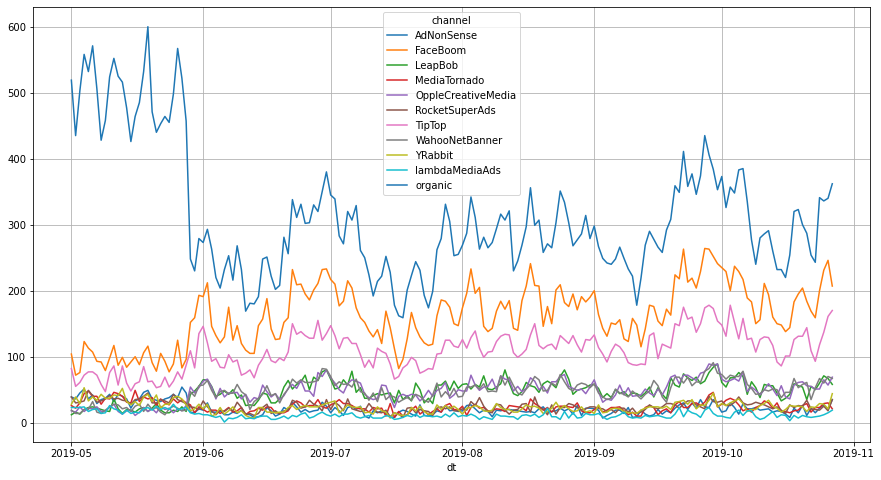

In [39]:
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 8), grid=True)

plt.show()

График подтверждает, привлечение по источнику 'Organic' всегда было выше, чем по остальным. Однако, заметно и сильное падение в июне 2019 г. прихода новых пользователей из данного источника. Возможно, это связано с сезонностью приложения, или с тем, что оно только появилось, и пользователи приходили сами.

**Вывод**

Анализ профиля пользователей приложения Procrastinate Pro+ показал, что:

1. Больше всего пользователей приходят из США, на втором месте - Великобритания и Франция. При этом доля платящих пользователей для США также выше, чем для других странах. Количество привлекаемых пользователей во всех странах, кроме США отличаются стабильностью. Для США же характерна высокая волатильность: от 300 до 850 новых пользователей в день, но даже минимальное значение выше уровня привлечения в других странах.

2. Пользователи заходят в приложение с устройств: Android, Mac, PC и iPhone. Первое место по использованию занимает iPhone, а вот доли платящих пользователей практически одинаковы для всех устройств.

3. Чаще всего пользовати приходят из источника 'Organic', на втором месте - 'Faceboom' и 'TipTop'. Но среди платящих пользователей клиентов из источника 'Organic' меньше всего, что нормально, а больше всего платящих пользователей среди клиентов, пришедших из 'FaceBoom', 'AdNonSense' и 'lambdaMediaAds'.

## Маркетинг

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Выясним, сколько денег потратили всего

In [40]:
print('Всего на маркетинг потратили - ', profiles['acquisition_cost'].sum())

Всего на маркетинг потратили -  105497.29999999999


Выясним, сколько денег потратили на каждый источник

In [41]:
(profiles.groupby('channel')
     .agg({'acquisition_cost':'sum'})
     .sort_values(by=('acquisition_cost'), ascending = False)
)

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Из таблицы видим, что больше всего денег потрачено на рекламу в популярных каналах привлечения: 'Faceboom' и 'TipTop'. Стоимость привлечения «органических» пользователей равна нулю, потому что они перешли в приложение самостоятельно, а не благодаря рекламе. 

Выясним, сколько денег потратили по времени

In [42]:
profiles.groupby('month').agg({'acquisition_cost':'sum'})

,acquisition_cost
month,
2019-05-01,9978.570
2019-06-01,15090.045
2019-07-01,16447.060
2019-08-01,20657.870
2019-09-01,22441.340
2019-10-01,20882.415


Больше всего денег было потрачено в период с августа по октябрь, а меньше всего - в мае 2019 г.: в 2 раза меньше, чем осенью.

Построим график, отображающий динамику расходов на маркетинг

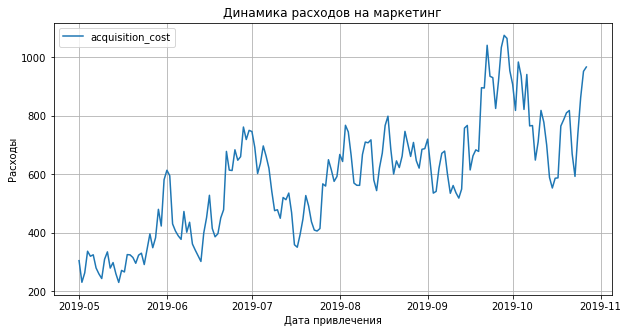

In [43]:
profiles.groupby('dt')[['acquisition_cost']].sum().plot(grid=True, figsize=(10, 5))
plt.ylabel('Расходы')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов на маркетинг')
plt.show()

График подтверждает, что расходы на рекламу растут с течением времени. Наибольший рост наблюдается в сентябре-октябре 2019 г.

Построим график истории изменений расходов на маркетинг по каналам привлечения

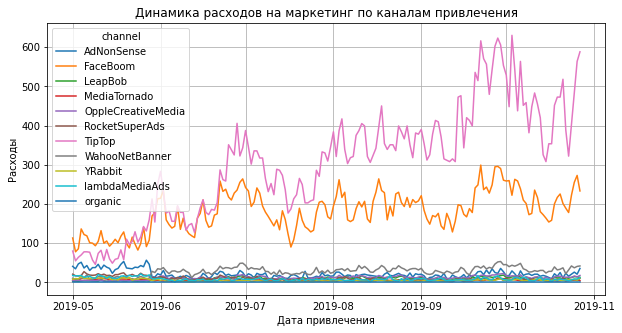

In [44]:
profiles.pivot_table(
    index='dt', 
    columns='channel', 
    values='acquisition_cost', 
    aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Расходы')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов на маркетинг по каналам привлечения')
plt.show()

Из графика видим, что общие расходы на источники 'Faceboom' и 'TipTop' растут с июня по октябрь 2019 г., хотя по остальным каналам расходы остуются неизменными.

Выясним, сколько в среднем стоило привлечение одного покупателя для всего проекта

In [45]:
# исключим из расчетов пользователей с органическим трафиком, поскольку мы за них ничего не платим.
profiles = profiles.query('channel != "organic"')

print('CAC на одного пользователя для всего проекта - ', profiles['acquisition_cost'].mean())

CAC на одного пользователя для всего проекта -  1.127481323942928


Рассмотрим, как менялся CAC за исследуемый период

In [46]:
profiles.groupby('month').agg({'acquisition_cost':'mean'})

,acquisition_cost
month,
2019-05-01,0.803686
2019-06-01,0.985311
2019-07-01,1.100800
2019-08-01,1.177422
2019-09-01,1.296962
2019-10-01,1.301166


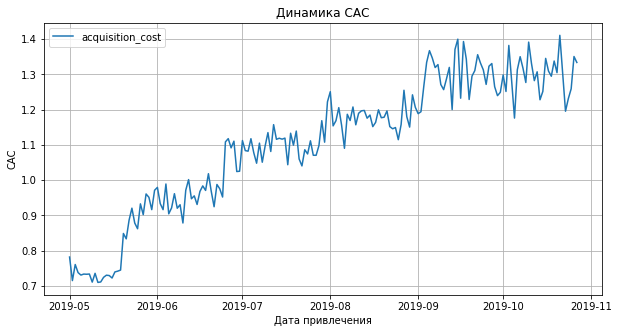

In [47]:
# построим график истории изменений CAC для всего проекта

profiles.pivot_table(
    index='dt',
    values='acquisition_cost', 
    aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС')
plt.show()

График подтверждает, что дороже всего реклама обошлась в период с июля по октябрь, а дешевле всего - в мае 2019 г.

Выясним, сколько в среднем стоило привлечение одного покупателя из каждого источника.

In [48]:
(profiles.groupby('channel')
     .agg({'acquisition_cost':'mean'})
     .sort_values(by=('acquisition_cost'), ascending = False)
)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


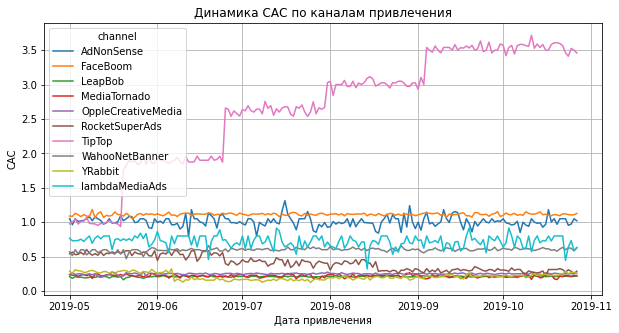

In [49]:
# построим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', 
    columns='channel', 
    values='acquisition_cost', 
    aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Стоимость привлечения «органических» пользователей равна нулю, потому что они перешли в приложение самостоятельно, а не благодаря рекламе. Привлечение одного пользователя из источника 'Faceboom' стабильно, а из источника 'TipTop' выше, чем из остальных источников и только растет со временем. Вероятно, с этим и связан рост расходов на рекламу к осени 2019 г.

**Вывод**

На данном рассчитали сумму расходов на маркетинг, а также выяснили, как траты распределены по времени и по источникам.

Анализ показал, что:

1. Расходы на рекламу выросли значительно с июля по октябрь 2019 г.

2. Больше всего денег потрачено на рекламу в 'Faceboom' и 'TipTop'. 

3. Привлечение одного пользователя из источника «Faceboom» стабильно, а из источника 'TipTop' только растет со временем. Вероятно, с этим и связан рост расходов на рекламу к осени 2019 г.

## Окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI проанализиурем:
- общую окупаемость рекламы;
- окупаемость рекламы с разбивкой по устройствам;
- окупаемость рекламы с разбивкой по странам;
- окупаемость рекламы с разбивкой по рекламным каналам.

In [50]:
# зададим момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14 # горизонт анализа

### Общая окупаемость рекламы

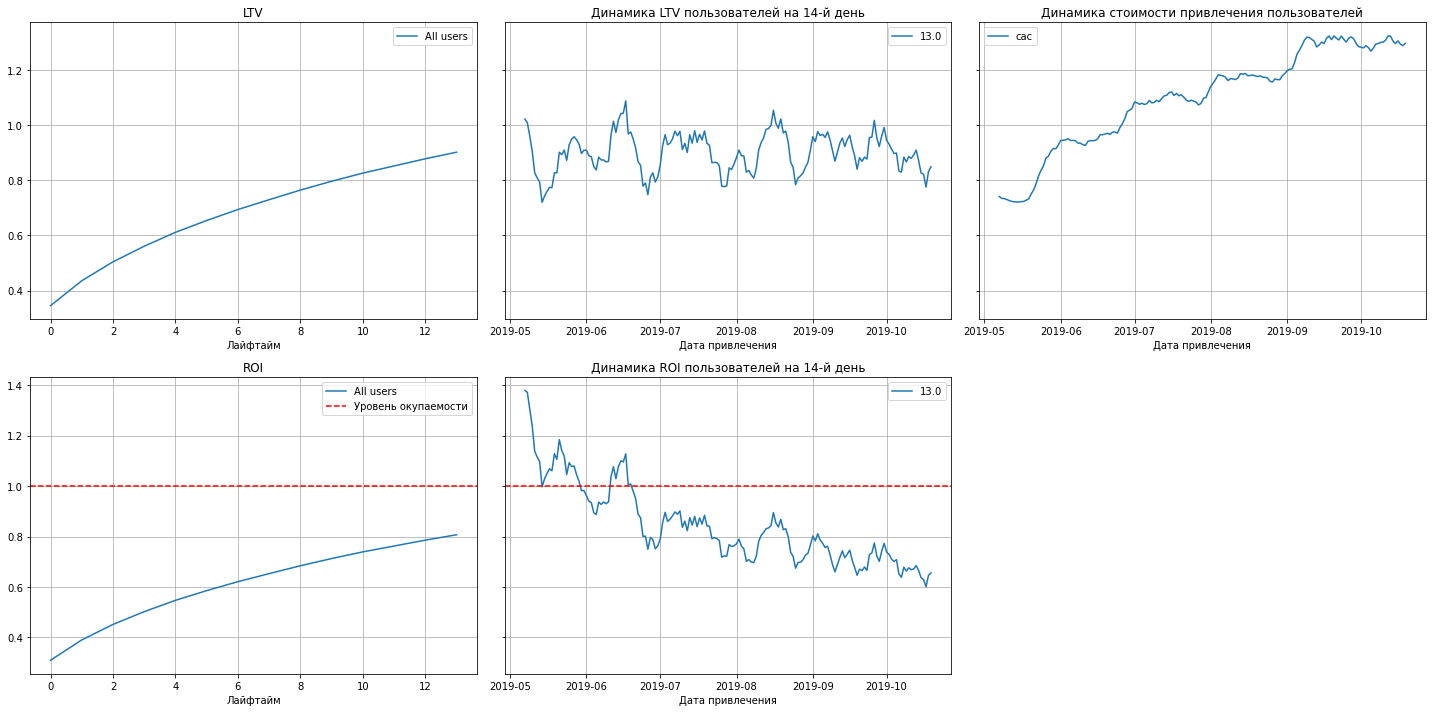

In [51]:
# для начала исключим из расчетов пользователей с органическим трафиком, поскольку мы за них ничего не платим. 
profiles = profiles.query('channel != "organic"')

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно вывести, что:

*   Реклама не окупается. ROI только в конце 2 недель приблизился к 80%.
*   CAC стремительно вырос к осени 2019 г., что мы уже выяснили на предыдущем этапе исследования.
*   LTV стабильно растет.

### Окупаемость рекламы с разбивкой по устройствам

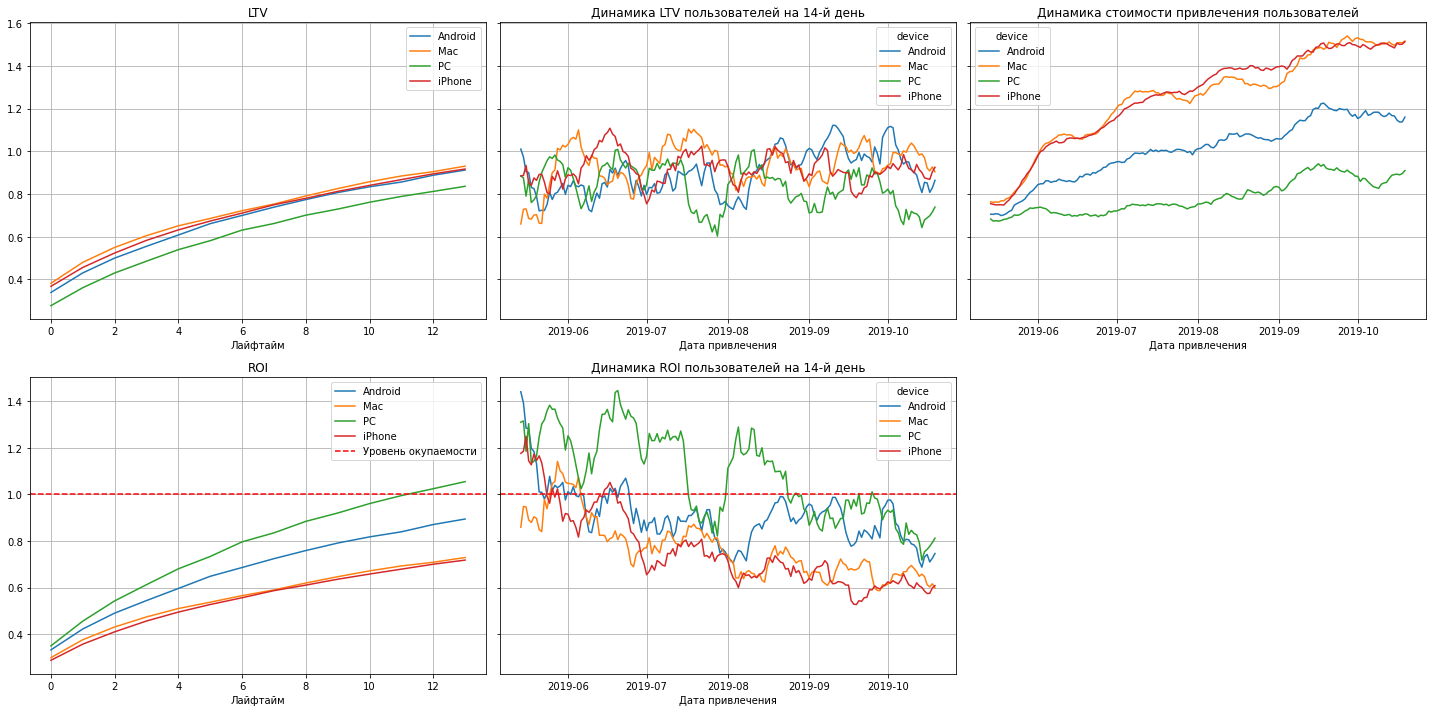

In [52]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Из графиков мы видим, что:

*   Стабильно окупаются только пользователи с PC в отличии от пользователей с MAC и мобильных устройств iPhone и Android.
*   CAC стремительно растет для пользователей всех устройств.

### Окупаемость рекламы с разбивкой по странам

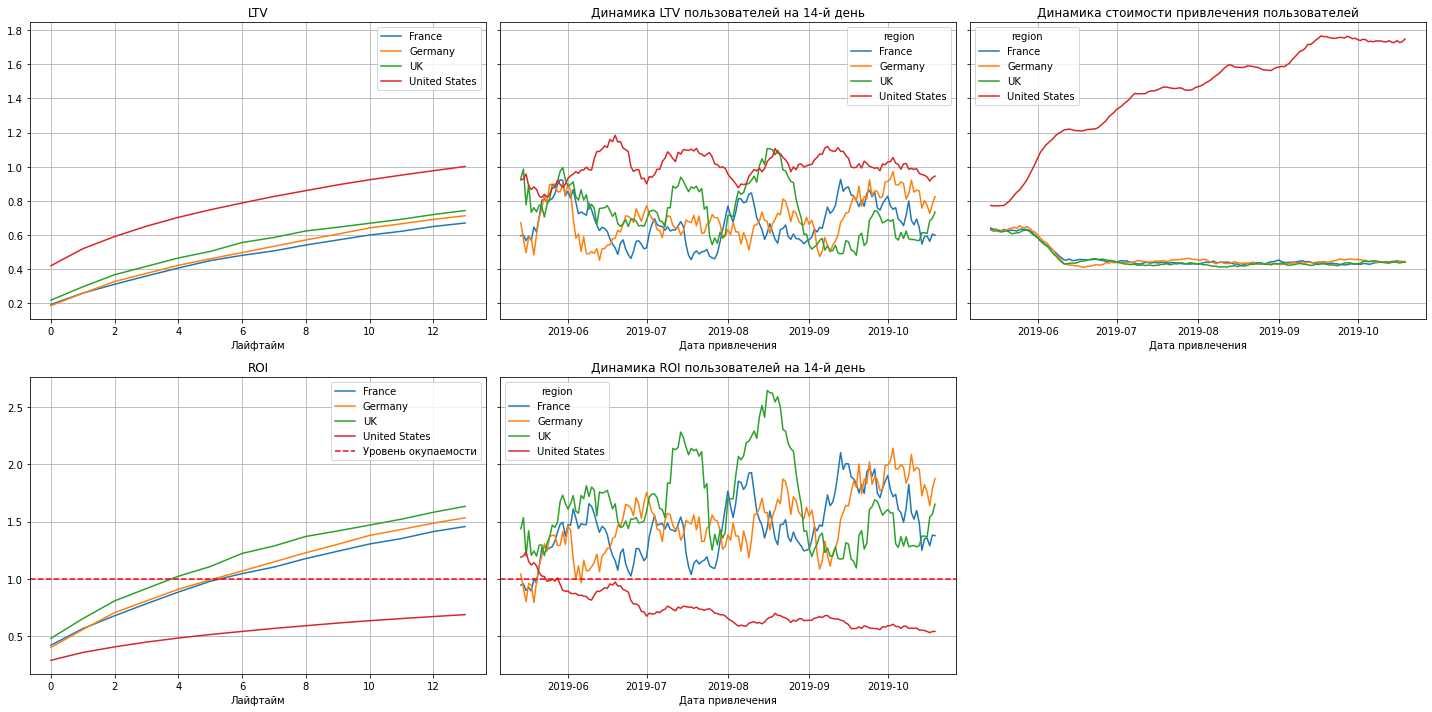

In [53]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам можно заключить, что:

*   Пользователи из США не окупаются в отличии от пользователей остальных стран.
*   CAC стремительно растет именно для пользователей из США.

Значит, дело в стране.

### Окупаемость рекламы с разбивкой по рекламным каналам

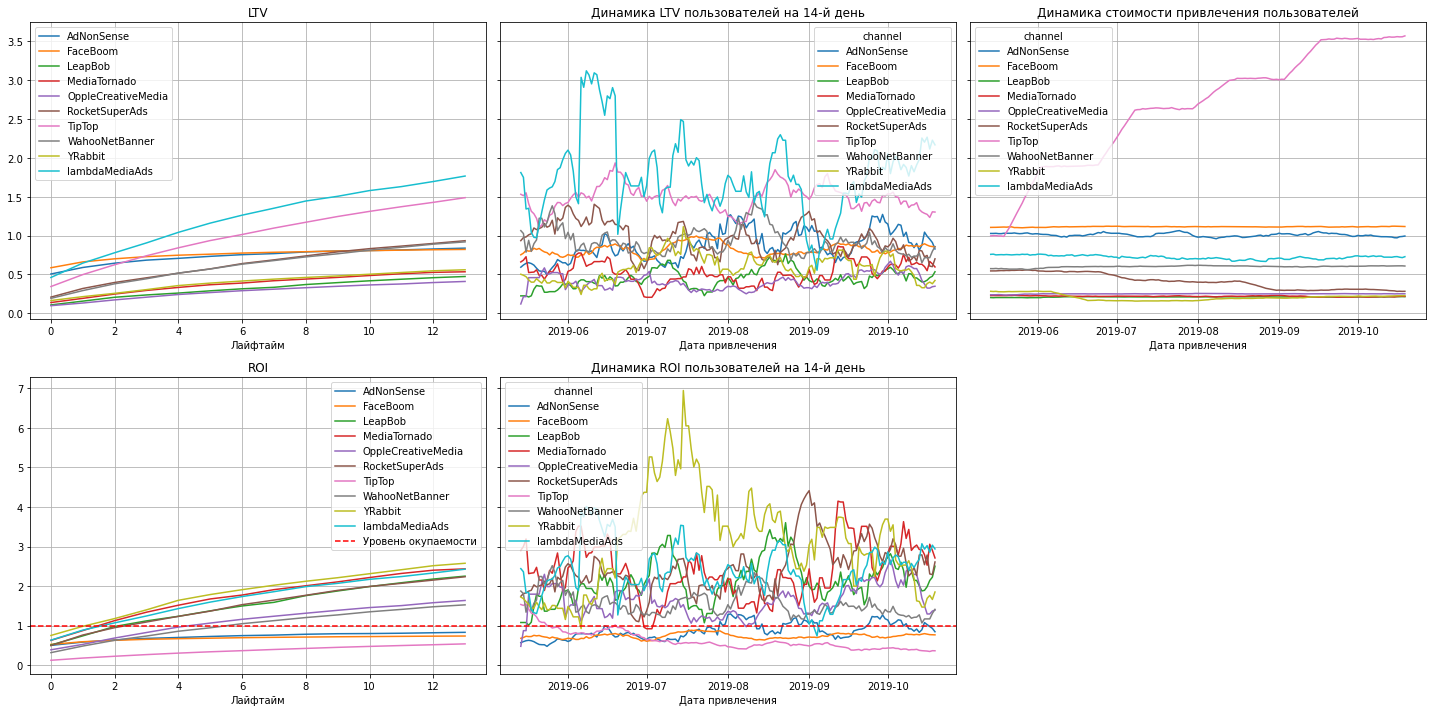

In [54]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Из графиков видно, что:

* Стоимость привлечения стабильна и одинакова для всех источников, кроме 'TipTop'.
* Большинство из источников стабильно окупаются, но именно 'TipTop' при высокой стоимости привлечения не окупается. Стоит обратить на это внимание.

**Вывод**

Из анализа окупаемости рекламы пришли к выводу, что:

*   Пользователи из США не окупаются в отличии от пользователей остальных стран.
*   CAC стремительно растет именно для пользователей из США.
*   Заметно выделяется стоимость привлечения одно пользователя для источника 'TipTop'.
*   Пользователи с PC стабильно окупаются в отличии от пользователей с MAC и мобильных устройств iPhone и Android.

Узнаем, в чём причина: в низкой конверсии или низком удержании.

Посчитаем и визуализируем конверсию с разбивкой по странам

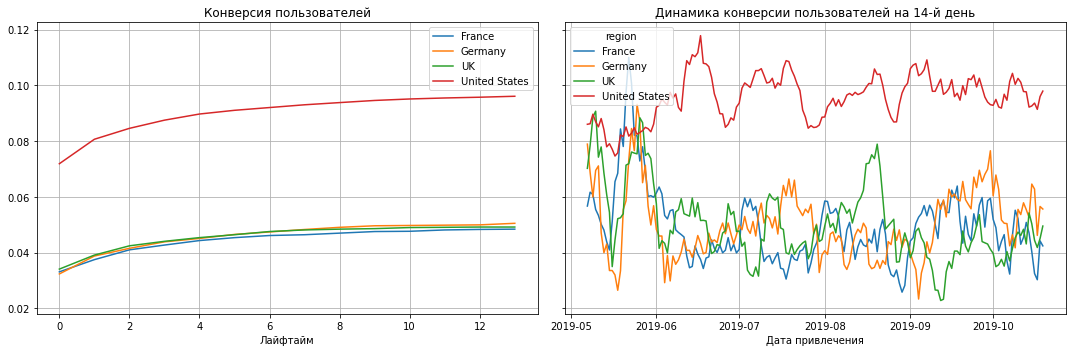

In [55]:
# смотрим конверсию с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Видим, что пользователи из США конвертируются очень хорошо, даже лучше, чем пользователи из других стран. Возможно, дело в удержании.

Рассчитаем удержание и отразим на графиках этот показатель.

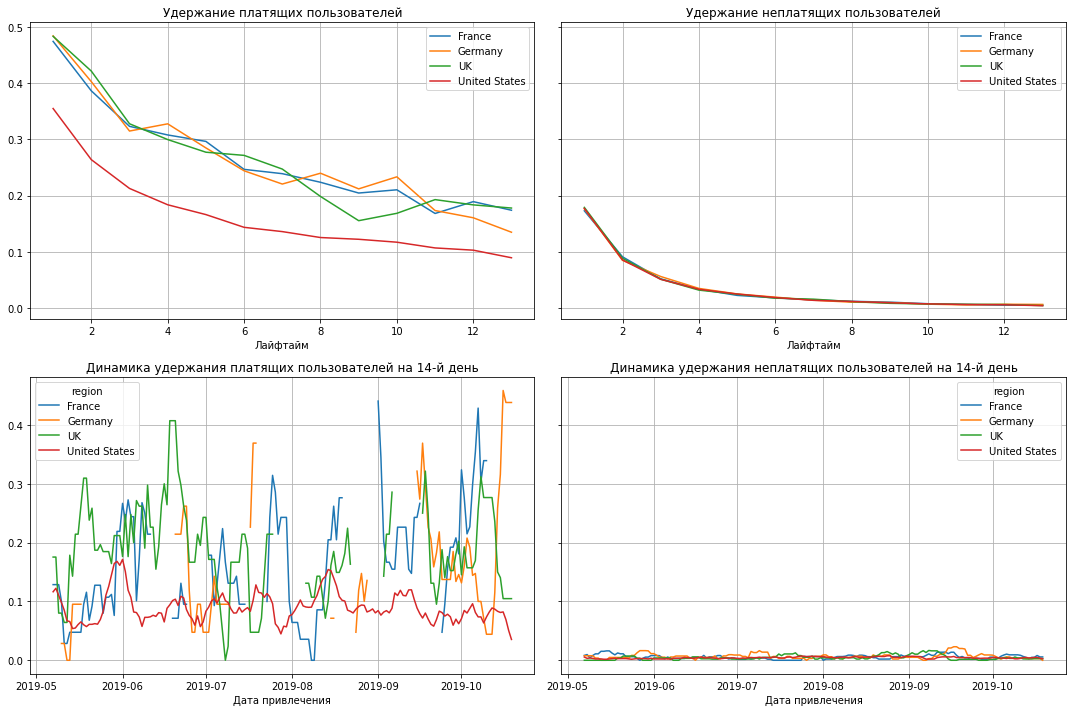

In [56]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

В самом деле, платящие пользователи из США плохо удерживаются. Для платящих пользователей из США удержание 14-го дня стабильно низкое.

Посчитаем и визуализируем конверсию с разбивкой по источникам привлечения

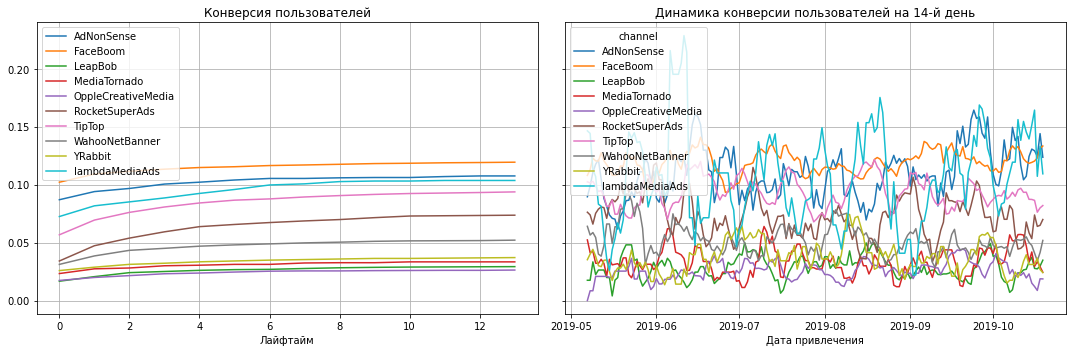

In [57]:
# смотрим конверсию с разбивкой по источникам привлечения

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Среди источников привлечения высокой конверсией выделятся 'Faceboom' и 'AdNonSense'.

Рассчитаем удержание и отразим на графиках этот показатель.

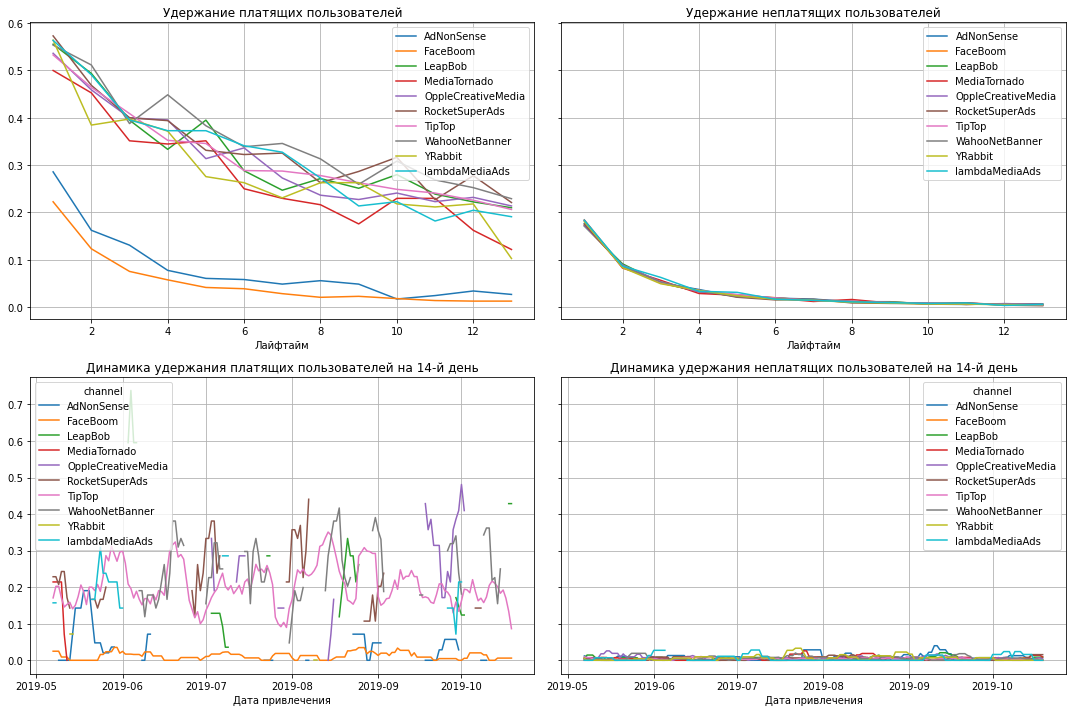

In [58]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Здесь мы видим, что хуже всего удерживаются пользователи из 'Faceboom' и 'AdNonSense'. Особенно выделяется удержание платящих пользователей через 'Faceboom' на 14-й день.

Посчитаем и визуализируем конверсию с разбивкой по устройствам

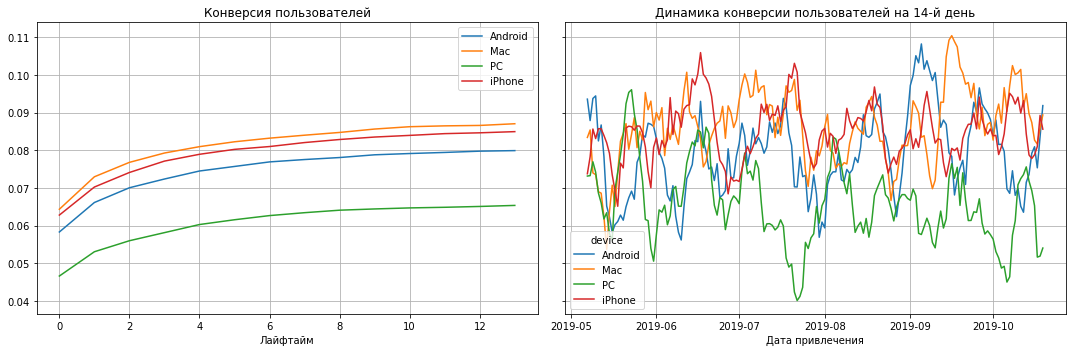

In [59]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи со всех устройств конвертируются примерно одинаково, кроме пользователей с PC.

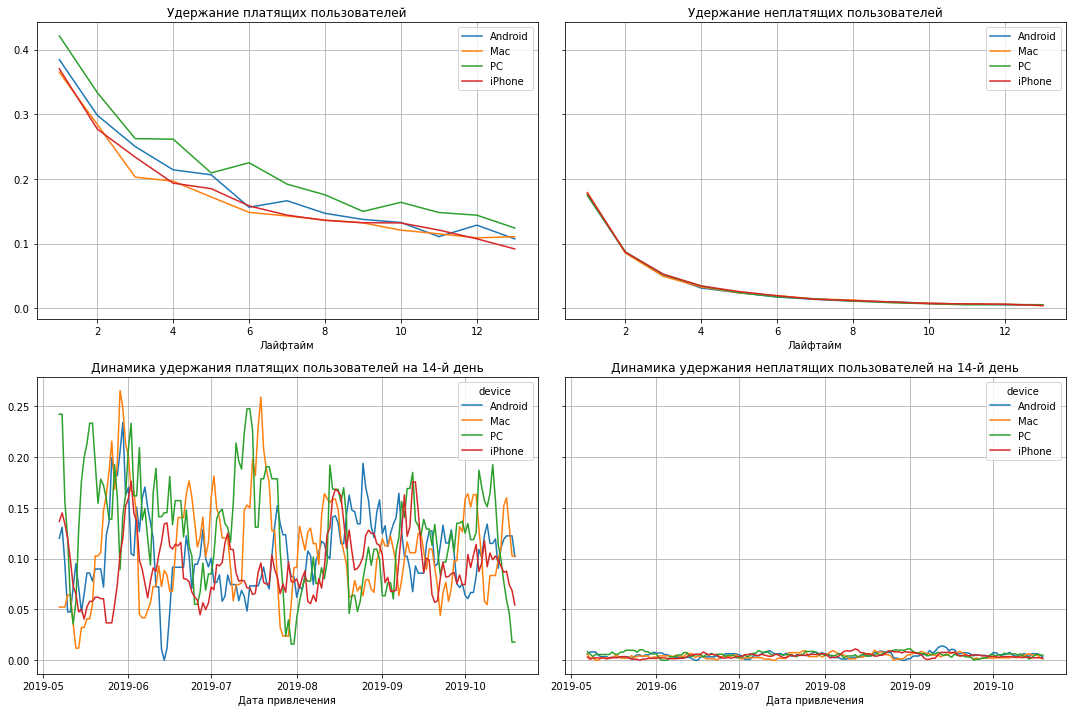

In [60]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Ни одно из устройств сильно не выделяется по удержанию пользователей.

## Общий вывод


В рамках исследования пользовательских профилей приложения Procrastinate Pro+ мы выяснили, что:

1. Больше всего пользователей приходят из США, на втором месте с большим отрывом - Великобритания и Франция. При этом доля платящих пользователей для США также выше, чем для других стран.
2. Клиенты Procrastinate Pro+ заходят в приложение с устройств: Android, Mac, PC и iPhone. Первое место по использованию занимает iPhone, а вот доли платящих пользователей практически одинаковы для всех устройств, кроме ПК.
3. Чаще всего пользователей приходят из источника 'Organic', на втором месте - 'Faceboom' и 'TipTop'. Но среди платящих пользователей клиентов из источника 'Organic' меньше всего, что нормально, а больше всего платящих пользователей среди клиентов, пришедших из 'FaceBoom', 'AdNonSense' и 'lambdaMediaAds'.

Анализ расходов на маркетинг показал, что:

1. Расходы на рекламу растут с течением времени. Наибольший рост наблюдается в сентябре-октябре 2019 г.
2. Больше всего денег потрачено на рекламу в 'Faceboom' и 'TipTop'.
3. Привлечение одного пользователя из источника 'Faceboom' стабильно, а из источника 'TipTop' только растет со временем. Вероятно, с этим и связан рост расходов на рекламу к осени 2019 г.

Из анализа окупаемости рекламы пришли к выводу, что:

1. Пользователи из США не окупаются в отличии от пользователей остальных стран.
2. CAC стремительно растет именно для пользователей из США.
3. Заметно выделяется стоимость привлечения одно пользователя для источника 'TipTop'.

Изучив конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам, выяснили, что:

1. Платящие пользователи из США плохо удерживаются. 
2. Хуже всего удерживаются пользователи из 'Faceboom' и 'AdNonSense', но при этом обладают стабильной хорошей конверсией.

Следовательно, для того чтобы компании выйти в плюс, рекомендуем:

1. Обратить внимание на пользователей из США, т.к. пользователи из США не окупаются в отличии от пользователей остальных стран, и удерживаются хуже пользователей из других стран. Возможно, есть какие-то технические проблемы или что-то в приложении не устраивает именно пользователей из США.

2. Отказаться от  канала привлечения 'TipTop', поскольку при быстром росте стоимости привлечения, данный канал не окупается. 

3. Обратить внимание на источник 'Faceboom' и 'AdNonSense', т.к. пользователи, пришедшие из 'Faceboom' и 'AdNonSense' плохо удерживаются, но при этом обладают стабильной хорошей конверсией и стабильно окупаются.

4. Увеличить бюджет на рекламу через источники: YRabbit, MediaTornado, lambdaMediaAds, LeapBob, RocketSuperAds, OppleCreativeMedia, WahooNetBanner, поскольку эти источники стабильно окупаются за исседуемый период.
